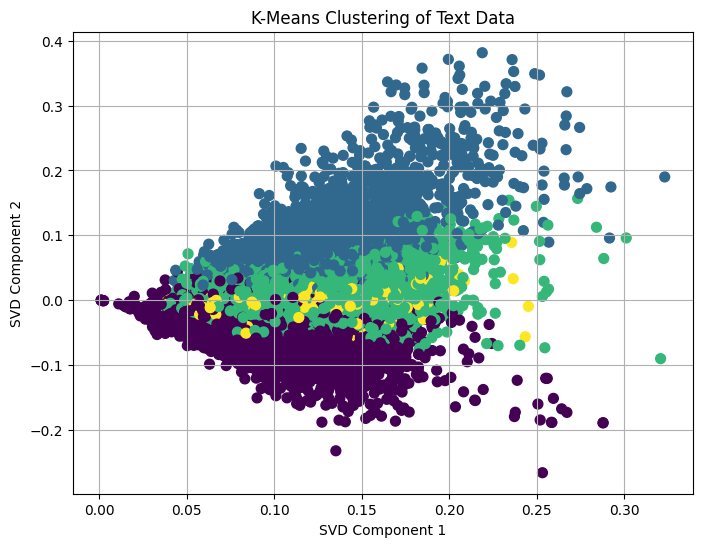

Cluster 0:
edu, university, lines, subject, organization, windows, posting, host, nntp, thanks

Cluster 1:
god, edu, people, jesus, israel, christian, com, writes, don, say

Cluster 2:
com, edu, writes, article, people, subject, don, organization, lines, just

Cluster 3:
game, edu, team, games, hockey, ca, year, players, baseball, toronto



In [2]:
# Question 8: Clustering Text Data
# Description: Apply K-Means clustering to a set of text documents (e.g., news articles) after using TF-IDF for feature extraction.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import TruncatedSVD

newsgroups = fetch_20newsgroups(subset='all')
documents = newsgroups.data

vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = vectorizer.fit_transform(documents)

kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(X_tfidf)

svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X_tfidf)

plt.figure(figsize=(8, 6))
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=y_kmeans, cmap='viridis', s=50)
plt.title("K-Means Clustering of Text Data")
plt.xlabel("SVD Component 1")
plt.ylabel("SVD Component 2")
plt.grid(True)
plt.show()

terms = vectorizer.get_feature_names_out()
for i, center in enumerate(kmeans.cluster_centers_):
    top_indices = center.argsort()[-10:][::-1]
    print(f"Cluster {i}:")
    print(", ".join([terms[j] for j in top_indices]))
    print()


